# Exam v 5

### 4.8 Diffusion using random walk (13 min)

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a row and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each row")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

Text(0, 0.5, 'distance from origin')

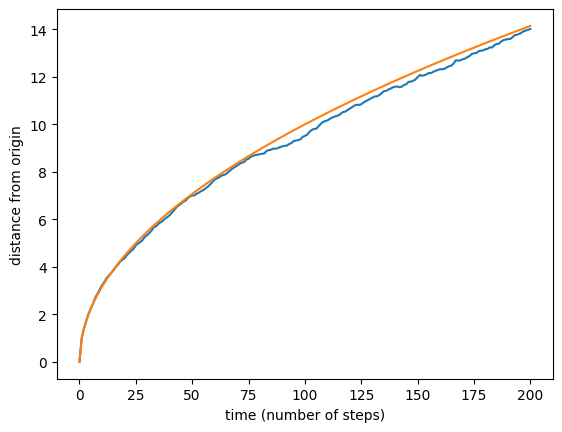

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

n_walkers = 1000
n_steps = 200
walker_steps = npr.choice([-1, +1], size = (n_walkers, n_steps))
walker_paths = np.zeros(shape = (n_walkers, n_steps + 1))
for step in range(n_steps + 1):
    walker_paths[:, step] = np.sum(walker_steps[:, :(step)], axis = 1)
walker_square_distance = walker_paths ** 2
mean_square_distance = np.mean(walker_square_distance, axis = 0)

plt.plot(np.arange(0, n_steps + 1), np.sqrt(mean_square_distance), label = "simulated")
plt.plot(np.arange(0, n_steps + 1), np.sqrt(np.arange(0, n_steps + 1)), label= "expected trend")
plt.xlabel("time (number of steps)")
plt.ylabel("distance from origin")

### BASH 3.1 (42 min)

**1\.a** Make a new directory called `students` in your home. Download a csv file with the list of students of this lab from [here](https://www.dropbox.com/s/867rtx3az6e9gm8/LCP_22-23_students.csv) (use the `wget` command) and copy that to `students`. First check whether the file is already there

**1\.b** Make two new files, one containing the students belonging to PoD, the other to Physics.

**1\.c** For each letter of the alphabet, count the number of students whose surname starts with that letter. 

**1\.d** Find out which is the letter with most counts.

**1\.e** Assume an obvious numbering of the students in the file (first line is 1, second line is 2, etc.), group students "modulo 18", i.e. 1,19,37,.. 2,20,38,.. etc. and put each group in a separate file  


```bash
### Bash script here

# 1.a
curl -L -O "https://www.dropbox.com/scl/fi/bxv17nrbrl83vw6qrkiu9/LCP_22-23_students.csv?rlkey=47fakvatrtif3q3qw4q97p5b7&e=1"
mkdir students
cd students
find . -name "LCP_22-23_students.csv" # return nothing (file not there)
cp ../LCP_22-23_students.csv ./LCP_22-23_students.csv
find . -name "LCP_22-23_students.csv" # now it finds the file
#1.b
head -n 3 LCP_22-23_students.csv
(grep "PoD" LCP_22-23_students.csv) > PoD_students.csv
(grep "Physics" LCP_22-23_students.csv) > Physics_students.csv

# 1.c
max_counts_letter=A
max_counts=$(grep -c "^$max_counts_letter" LCP_22-23_students.csv)
for letter in {A..Z}; do
    counts=$(grep -c "^$letter" LCP_22-23_students.csv)
    echo "letter $letter counts $counts"
    if [ $counts -ge $max_counts ]; then
        max_counts_letter=$letter
        max_counts=$counts
    fi
done
echo "letter with most counts is $max_counts_letter with $max_counts counts"

# 1.d
#cd students
line_idx=0 # skip first row which is (Family name(s),Given name(s),E-mail,Master program)
while IFS= read -r line; do
    if [ $line_idx -gt 0 ]; then
        module=$(( line_idx % 18 ))
        (echo "$line") >> students_{$module}_mod_18.csv
    fi
    (( line_idx++ ))
done < LCP_22-23_students.csv
```

In [28]:
%%bash

Family name(s),Given name(s),E-mail,Master program
Akkara,Jelin Raphael,jelinraphael.akkara@studenti.unipd.it,PoD
Altamirano,Davide,davidalejandro.altamiranocoello@studenti.unipd.it,PoD
LCP_22-23_students.csv
Physics_students.csv
PoD_students.csv
students_.csv
students_{0}_mod_18.csv
students_{10}_mod_18.csv
students_{11}_mod_18.csv
students_{12}_mod_18.csv
students_{13}_mod_18.csv
students_{14}_mod_18.csv
students_{15}_mod_18.csv
students_{16}_mod_18.csv
students_{17}_mod_18.csv
students_{1}_mod_18.csv
students_{2}_mod_18.csv
students_{3}_mod_18.csv
students_{4}_mod_18.csv
students_{5}_mod_18.csv
students_{6}_mod_18.csv
students_{7}_mod_18.csv
students_{8}_mod_18.csv
students_{9}_mod_18.csv


### 2\. Color-coded scatter plot  (11 min)

Produce a scatter plot out of a dataset with two categories (== variables)

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

! curl -O -L https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png

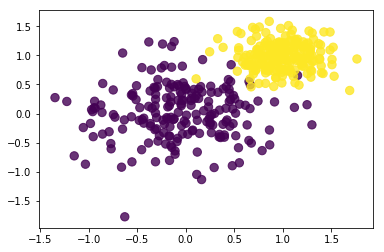

In [3]:
import matplotlib.pyplot as plt
#!curl -O -L "https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png"
from IPython.display import Image
Image("two_categories_scatter_plot.png")

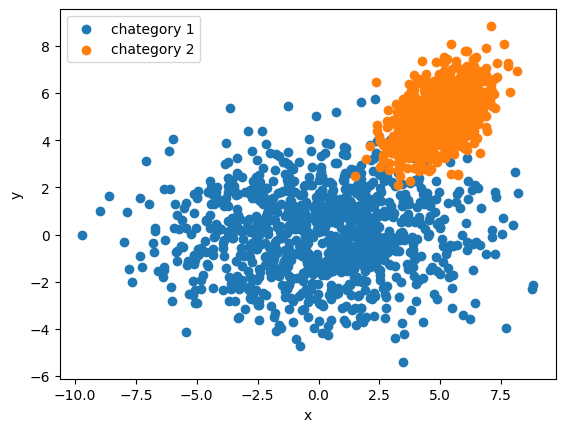

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mean_1 =  np.array([0, 0])
Sigma_1 = np.array([[9, 0],[0, 3]])

mean_2 =  np.array([5, 5])
Sigma_2 = np.array([[1, 0.5],[0.5, 1]])
data_1 = multivariate_normal.rvs(mean=mean_1, cov=Sigma_1, size=1000, random_state=None)
data_2 = multivariate_normal.rvs(mean=mean_2, cov=Sigma_2, size=1000, random_state=None)


plt.scatter(x = data_1[:, 0], y = data_1[:, 1], label = "chategory 1")
plt.scatter(x = data_2[:, 0], y = data_2[:, 1], label = "chategory 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

### 9.1 Maximum wind speed prediction at the Sprogø station (16 min)

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, *it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile*.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for *fitting the quantile function*. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```


estimated max wind every 50 years 32.979898440194695


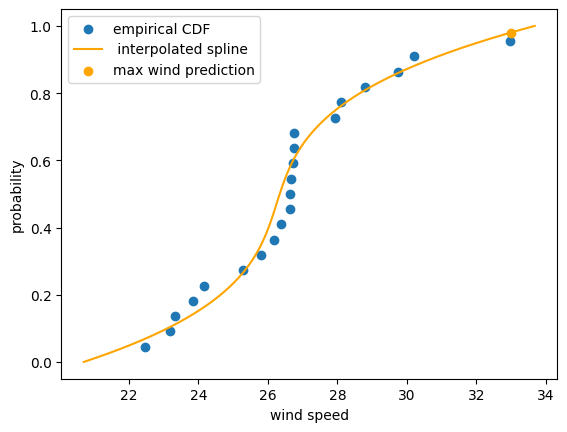

In [21]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
max_speeds = np.sort(max_speeds)
estimated_cum_prob = 1/(years_nb + 1) * np.arange(1, years_nb + 1)
plt.scatter(max_speeds, estimated_cum_prob , label = "empirical CDF")

spline = UnivariateSpline(x = estimated_cum_prob, y= max_speeds)
plt.plot(spline( np.linspace(0, 1, 1000)), np.linspace(0, 1, 1000), color = "orange", label = " interpolated spline")
fifty_prob = 1 -0.02
max_wind = spline(fifty_prob)
print("estimated max wind every 50 years", max_wind)
plt.scatter(max_wind, fifty_prob, color = "orange", label = "max wind prediction")
plt.xlabel("wind speed")
plt.ylabel("probability")
plt.legend()

### 10.5 **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84